In [1]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 28.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# **Load File**

In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit Card Fraud Detection/Back End/fraudTrain.csv')
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit Card Fraud Detection/Back End/fraudTest.csv')
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
df_train.shape

(1296675, 23)

In [7]:
df_test.shape

(555719, 23)

#**Data Cleaning & Pre-Processing**

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [9]:
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
df_train.duplicated().sum()

0

**Remove the Extra Train Columns**

In [11]:
df_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [12]:
df_train = df_train.drop(['Unnamed: 0', 'trans_date_trans_time','trans_num','unix_time', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long'] ,axis=1)

In [13]:
df_train.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,is_fraud
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,0


**Removing the Extra Test Columns**

In [14]:
df_test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [15]:
df_test = df_test.drop(['Unnamed: 0', 'trans_date_trans_time','trans_num','unix_time', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long'] ,axis=1)

In [16]:
df_test.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,is_fraud
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,0
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,0
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,0
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,0
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,0


**Balancing the Train DataSet**

In [17]:
df_train['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [18]:
legit = df_train[df_train.is_fraud == 0]
fraud =df_train[df_train.is_fraud == 1]

In [19]:
print(legit.shape)
print(fraud.shape)

(1289169, 12)
(7506, 12)


In [20]:
legit_sample = legit.sample(n = 7506)

In [21]:
new_df_train = pd.concat([legit_sample, fraud] , axis = 0)

In [22]:
new_df_train['is_fraud'].value_counts()

0    7506
1    7506
Name: is_fraud, dtype: int64

**Balancing the Test DataSet**

In [23]:
df_test['is_fraud'].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

In [24]:
legit1 = df_test[df_test.is_fraud == 0]
fraud1 =df_test[df_test.is_fraud == 1]

In [25]:
print(legit1.shape)
print(fraud1.shape)

(553574, 12)
(2145, 12)


In [26]:
legit_sample1 = legit1.sample(n = 2145)

In [27]:
new_df_test = pd.concat([legit_sample1, fraud1] , axis = 0)

In [28]:
new_df_test.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,is_fraud
340123,639046421587,fraud_Rutherford-Mertz,grocery_pos,99.37,Dylan,Bonilla,M,2497 John Motorway Suite 922,Leetsdale,PA,15056,0
447213,4640395708703,fraud_Gottlieb Group,kids_pets,70.75,Melissa,Krause,F,67632 Martin Gateway,Fordoche,LA,70732,0
194440,4365382885912355,fraud_Streich Ltd,home,74.00,Robert,Goodman,M,956 Paul Fields Suite 108,Orr,MN,55771,0
249893,2235613922823698,fraud_Kihn-Schuster,food_dining,1.59,Melissa,Mcclure,F,2027 Snyder Track,Manville,WY,82227,0
293959,3543591270174051,fraud_Barton Inc,grocery_pos,96.05,Margaret,Lam,F,6911 Nicholas Keys Apt. 237,Armagh,PA,15920,0


In [29]:
new_df_test['is_fraud'].value_counts()

0    2145
1    2145
Name: is_fraud, dtype: int64

**Convert Catagorical Columns into Numeric**

In [30]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state']
le = LabelEncoder()

In [31]:
for train_column in columns_to_encode:
    new_df_train[train_column + '_encoded'] = le.fit_transform(new_df_train[train_column])

In [32]:
for test_column in columns_to_encode:
    new_df_test[test_column + '_encoded'] = le.fit_transform(new_df_test[test_column])

In [33]:
new_df_train.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,is_fraud,merchant_encoded,category_encoded,first_encoded,last_encoded,gender_encoded,street_encoded,city_encoded,state_encoded
665295,6554245334757802,"fraud_Mante, Luettgen and Hackett",health_fitness,7.09,Monique,Robinson,F,07712 Marcus Divide Apt. 831,Laguna Hills,CA,92637,0,406,5,251,367,0,73,420,4
744384,345832460465610,fraud_Kutch-Wilderman,home,23.73,Jason,Mcmahon,M,6385 Donald Square Suite 429,Springfield,VA,22151,0,364,6,157,281,1,641,769,45
479030,2235613922823698,"fraud_Kutch, Hermiston and Farrell",gas_transport,73.76,Melissa,Mcclure,F,2027 Snyder Track,Manville,WY,82227,0,360,2,239,272,0,198,477,50
275214,180036456789979,"fraud_Reilly, Heaney and Cole",gas_transport,33.46,Mackenzie,Salazar,F,982 Melissa Lock,Bagley,WI,53801,0,508,2,223,380,0,970,44,48
86154,3567697931646329,fraud_Romaguera Ltd,health_fitness,51.08,John,Stevens,M,428 Morgan River,Hudson,NY,12534,0,526,5,174,412,1,430,364,34


In [34]:
new_df_test.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,is_fraud,merchant_encoded,category_encoded,first_encoded,last_encoded,gender_encoded,street_encoded,city_encoded,state_encoded
340123,639046421587,fraud_Rutherford-Mertz,grocery_pos,99.37,Dylan,Bonilla,M,2497 John Motorway Suite 922,Leetsdale,PA,15056,0,530,4,95,30,1,198,368,37
447213,4640395708703,fraud_Gottlieb Group,kids_pets,70.75,Melissa,Krause,F,67632 Martin Gateway,Fordoche,LA,70732,0,193,7,212,207,0,554,224,17
194440,4365382885912355,fraud_Streich Ltd,home,74.00,Robert,Goodman,M,956 Paul Fields Suite 108,Orr,MN,55771,0,589,6,249,142,1,770,502,22
249893,2235613922823698,fraud_Kihn-Schuster,food_dining,1.59,Melissa,Mcclure,F,2027 Snyder Track,Manville,WY,82227,0,308,1,212,240,0,164,402,48
293959,3543591270174051,fraud_Barton Inc,grocery_pos,96.05,Margaret,Lam,F,6911 Nicholas Keys Apt. 237,Armagh,PA,15920,0,25,4,200,208,0,564,25,37


In [35]:
df_encoded_train = new_df_train.drop(columns=columns_to_encode)

In [36]:
df_encoded_test = new_df_test.drop(columns=columns_to_encode)

In [37]:
df_encoded_train.head()

,cc_num,amt,zip,is_fraud,merchant_encoded,category_encoded,first_encoded,last_encoded,gender_encoded,street_encoded,city_encoded,state_encoded
665295,6554245334757802,7.09,92637,0,406,5,251,367,0,73,420,4
744384,345832460465610,23.73,22151,0,364,6,157,281,1,641,769,45
479030,2235613922823698,73.76,82227,0,360,2,239,272,0,198,477,50
275214,180036456789979,33.46,53801,0,508,2,223,380,0,970,44,48
86154,3567697931646329,51.08,12534,0,526,5,174,412,1,430,364,34


In [38]:
df_encoded_test.head()

,cc_num,amt,zip,is_fraud,merchant_encoded,category_encoded,first_encoded,last_encoded,gender_encoded,street_encoded,city_encoded,state_encoded
340123,639046421587,99.37,15056,0,530,4,95,30,1,198,368,37
447213,4640395708703,70.75,70732,0,193,7,212,207,0,554,224,17
194440,4365382885912355,74.00,55771,0,589,6,249,142,1,770,502,22
249893,2235613922823698,1.59,82227,0,308,1,212,240,0,164,402,48
293959,3543591270174051,96.05,15920,0,25,4,200,208,0,564,25,37


**Standardize the Inputs**

In [39]:
df_encoded_test.columns

Index(['cc_num', 'amt', 'zip', 'is_fraud', 'merchant_encoded',
       'category_encoded', 'first_encoded', 'last_encoded', 'gender_encoded',
       'street_encoded', 'city_encoded', 'state_encoded'],
      dtype='object')

In [40]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['cc_num', 'amt', 'zip', 'is_fraud','merchant_encoded', 'category_encoded', 'first_encoded', 'last_encoded','gender_encoded', 'street_encoded', 'city_encoded', 'state_encoded']
scaler = StandardScaler()

In [41]:
X_train_scaled = scaler.fit_transform(df_encoded_train[columns_to_scale])
X_test_scaled = scaler.fit_transform(df_encoded_test[columns_to_scale])

In [42]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = ['cc_num', 'amt', 'zip', 'is_fraud', 'merchant_encoded',
       'category_encoded', 'first_encoded', 'last_encoded', 'gender_encoded',
       'street_encoded', 'city_encoded', 'state_encoded'])
X_train_scaled

,cc_num,amt,zip,is_fraud,merchant_encoded,category_encoded,first_encoded,last_encoded,gender_encoded,street_encoded,city_encoded,state_encoded
0,-0.314081,-0.788956,1.642279,-1.0,0.321038,-0.447604,0.746016,0.843588,-0.944642,-1.489044,-0.081623,-1.592847
1,-0.318844,-0.744044,-0.970021,-1.0,0.107367,-0.189492,-0.218960,0.216634,1.058602,0.531802,1.266009,1.277879
2,-0.317394,-0.609013,1.256471,-1.0,0.087017,-1.221939,0.622828,0.151022,-0.944642,-1.044316,0.138478,1.627967
3,-0.318972,-0.717783,0.202968,-1.0,0.839956,-1.221939,0.458576,0.938361,-0.944642,1.702327,-1.533513,1.487932
4,-0.316372,-0.670226,-1.326439,-1.0,0.931529,-0.447604,-0.044443,1.171646,1.058602,-0.218900,-0.297862,0.507684
...,...,...,...,...,...,...,...,...,...,...,...,...
15007,-0.316405,1.828874,-0.569426,1.0,-0.243666,1.101067,-1.553501,-1.438234,-0.944642,1.545783,1.497694,-1.242758
15008,-0.316405,2.460174,-0.569426,1.0,1.160463,1.101067,-1.553501,-1.438234,-0.944642,1.545783,1.497694,-1.242758
15009,-0.316036,-0.780454,0.830229,1.0,1.419922,-1.221939,1.741789,0.639464,1.058602,-0.097934,-0.896380,-0.612599
15010,-0.316378,-0.749550,1.165004,1.0,-1.200101,-1.221939,-1.307125,1.113325,-0.944642,0.524686,0.582540,1.137844


In [43]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns = ['cc_num', 'amt', 'zip', 'is_fraud', 'merchant_encoded',
       'category_encoded', 'first_encoded', 'last_encoded', 'gender_encoded',
       'street_encoded', 'city_encoded', 'state_encoded'])
X_test_scaled

,cc_num,amt,zip,is_fraud,merchant_encoded,category_encoded,first_encoded,last_encoded,gender_encoded,street_encoded,city_encoded,state_encoded
0,-0.318663,-0.535518,-1.239217,-1.0,1.016471,-0.717448,-0.696562,-1.513702,1.112597,-0.847029,-0.007638,0.897914
1,-0.318660,-0.612788,0.839249,-1.0,-0.734700,0.057049,0.626344,-0.092703,-0.898798,0.690735,-0.676058,-0.572728
2,-0.315365,-0.604014,0.280733,-1.0,1.323056,-0.201117,1.044699,-0.614539,1.112597,1.623761,0.614364,-0.205067
3,-0.316974,-0.799511,1.268374,-1.0,-0.137120,-1.491945,0.626344,0.172229,-0.898798,-0.993894,0.150184,1.706767
4,-0.315986,-0.544482,-1.206963,-1.0,-1.607688,-0.717448,0.490661,-0.084675,-0.898798,0.733931,-1.599777,0.897914
...,...,...,...,...,...,...,...,...,...,...,...,...
4285,-0.316969,2.008137,-0.357747,1.0,1.655623,1.347878,1.576122,-1.104262,1.112597,-1.274666,1.111037,-0.058003
4286,-0.316969,1.539925,-0.357747,1.0,0.034360,1.347878,1.576122,-1.104262,1.112597,-1.274666,1.111037,-0.058003
4287,-0.316969,2.002494,-0.357747,1.0,0.512425,1.089712,1.576122,-1.104262,1.112597,-1.274666,1.111037,-0.058003
4288,-0.316969,-0.022813,-0.357747,1.0,-1.586902,-0.717448,1.576122,-1.104262,1.112597,-1.274666,1.111037,-0.058003


**Removing the column that has high VIF**

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = X_train_scaled[["cc_num",	"amt",	"zip",	"is_fraud",	"merchant_encoded",	"category_encoded",	"first_encoded",	"last_encoded",	"gender_encoded",	"street_encoded",	"city_encoded",	"state_encoded"]]

In [45]:
vif_data = pd.DataFrame() #converting the data into df
vif_data["feature"] = x.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

print(vif_data)

             feature       VIF
0             cc_num  1.005686
1                amt  2.112514
2                zip  1.027543
3           is_fraud  1.717017
4   merchant_encoded  1.001869
5   category_encoded  1.305536
6      first_encoded  1.008454
7       last_encoded  1.008066
8     gender_encoded  1.016770
9     street_encoded  1.005174
10      city_encoded  1.010141
11     state_encoded  1.025151


# **Exploratory Data Analysis (EDA)**


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df_train_corr = X_train_scaled.corr()
df_train_corr

,cc_num,amt,zip,is_fraud,merchant_encoded,category_encoded,first_encoded,last_encoded,gender_encoded,street_encoded,city_encoded,state_encoded
cc_num,1.000000,0.009520,0.040206,-0.011911,-0.002952,-0.004094,0.008849,0.013112,0.005863,0.004717,0.050191,-0.033215
amt,0.009520,1.000000,-0.015282,0.625950,-0.006667,0.444639,-0.010933,-0.001204,0.086787,0.002831,-0.005124,0.013106
zip,0.040206,-0.015282,1.000000,-0.010590,0.008208,-0.003185,0.014127,0.002352,-0.050167,-0.038848,0.063221,-0.133283
is_fraud,-0.011911,0.625950,-0.010590,1.000000,-0.007375,0.136776,-0.022393,-0.006821,0.061784,0.003695,-0.011444,0.017710
merchant_encoded,-0.002952,-0.006667,0.008208,-0.007375,1.000000,0.033095,-0.005932,-0.003154,-0.004034,0.000974,0.006056,-0.007076
category_encoded,-0.004094,0.444639,-0.003185,0.136776,0.033095,1.000000,-0.007484,-0.008295,-0.005098,-0.001284,-0.004880,-0.005039
first_encoded,0.008849,-0.010933,0.014127,-0.022393,-0.005932,-0.007484,1.000000,-0.070948,0.008065,-0.039632,0.008341,0.027101
last_encoded,0.013112,-0.001204,0.002352,-0.006821,-0.003154,-0.008295,-0.070948,1.000000,0.023958,0.023401,0.029525,-0.031352
gender_encoded,0.005863,0.086787,-0.050167,0.061784,-0.004034,-0.005098,0.008065,0.023958,1.000000,0.032702,0.016291,-0.039341
street_encoded,0.004717,0.002831,-0.038848,0.003695,0.000974,-0.001284,-0.039632,0.023401,0.032702,1.000000,-0.027182,0.007500


<Axes: >

<Figure size 2000x800 with 0 Axes>

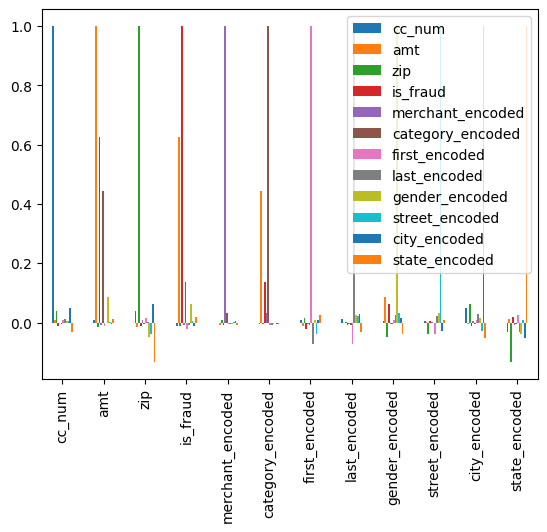

In [48]:
plt.figure(figsize=(20,8))
df_train_corr.plot(kind='bar')

<ipython-input-49-57e76859cc27>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot=True)


<Axes: >

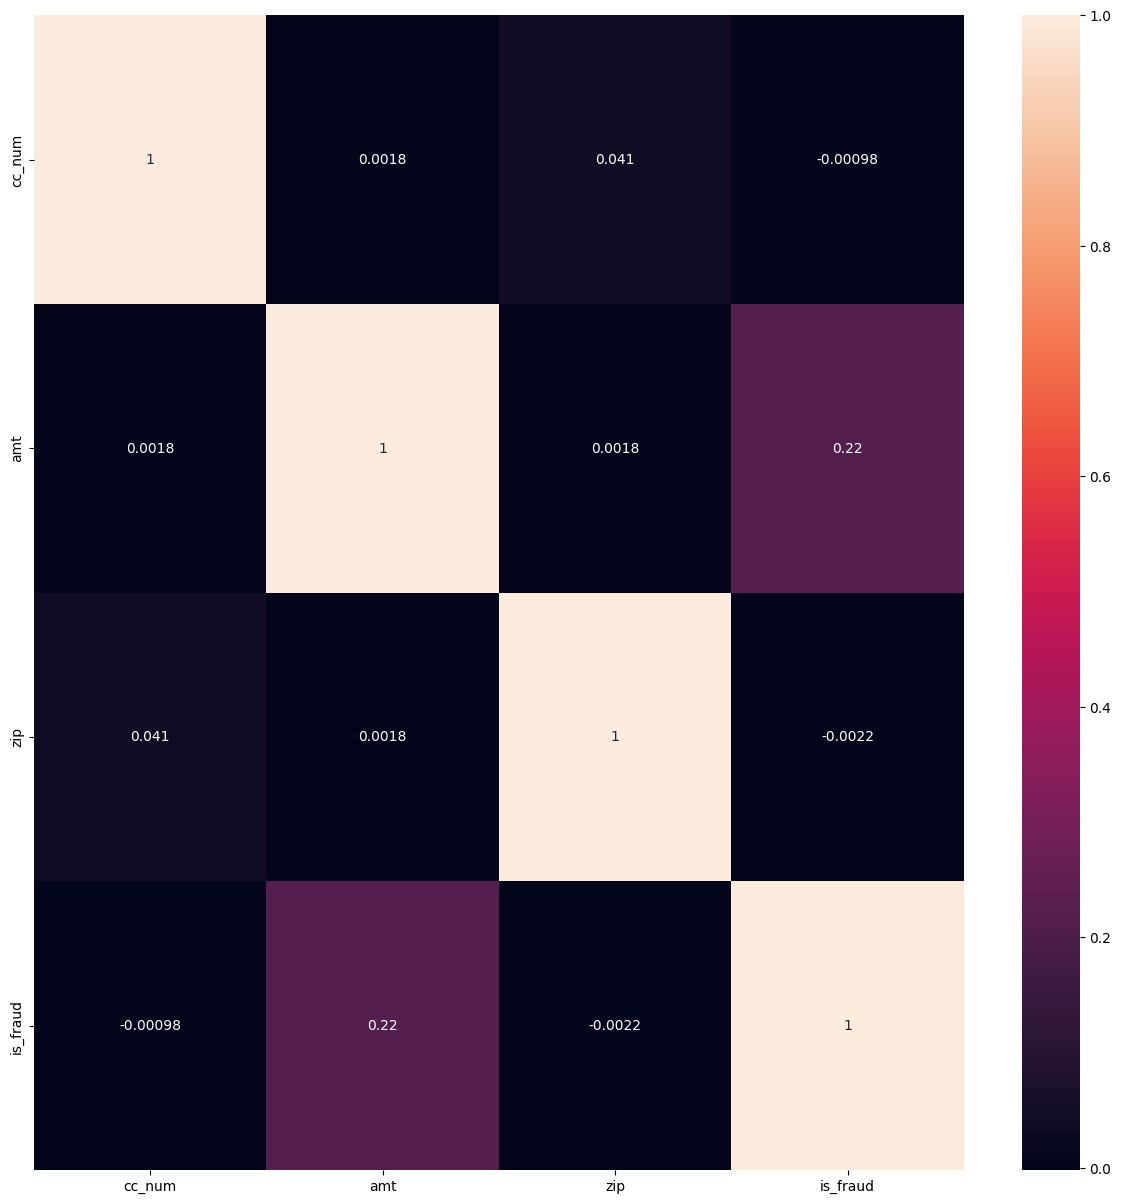

In [49]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(),annot=True)

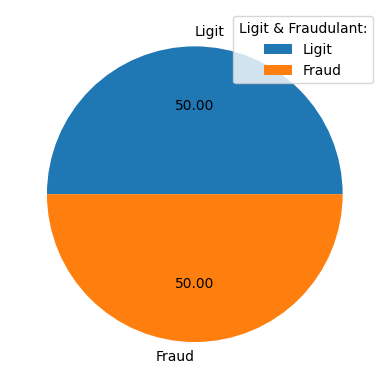

In [50]:
plt.pie(X_train_scaled['is_fraud'].value_counts(), labels = ['Ligit', 'Fraud'], autopct = '%0.2f')
plt.legend(title = 'Ligit & Fraudulant:', loc='upper right')
plt.show()

<Axes: ylabel='Count'>

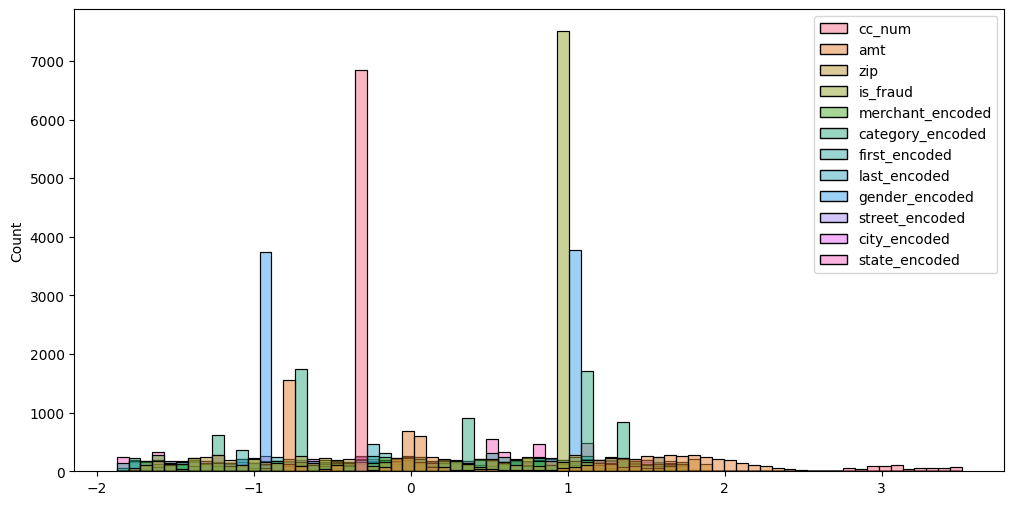

In [51]:
plt.figure(figsize = (12,6))
sns.histplot(X_train_scaled[X_train_scaled['is_fraud'] == 0])
sns.histplot(X_train_scaled[X_train_scaled['is_fraud'] == 1])

In [52]:
sns.pairplot(X_train_scaled, hue = 'is_fraud')

Output hidden; open in https://colab.research.google.com to view.

# **Model Building**

In [53]:
X_train_data = X_train_scaled.drop(columns = 'is_fraud', axis = 1)
y_train_data = X_train_scaled['is_fraud']

In [54]:
X_train_data

,cc_num,amt,zip,merchant_encoded,category_encoded,first_encoded,last_encoded,gender_encoded,street_encoded,city_encoded,state_encoded
0,-0.314081,-0.788956,1.642279,0.321038,-0.447604,0.746016,0.843588,-0.944642,-1.489044,-0.081623,-1.592847
1,-0.318844,-0.744044,-0.970021,0.107367,-0.189492,-0.218960,0.216634,1.058602,0.531802,1.266009,1.277879
2,-0.317394,-0.609013,1.256471,0.087017,-1.221939,0.622828,0.151022,-0.944642,-1.044316,0.138478,1.627967
3,-0.318972,-0.717783,0.202968,0.839956,-1.221939,0.458576,0.938361,-0.944642,1.702327,-1.533513,1.487932
4,-0.316372,-0.670226,-1.326439,0.931529,-0.447604,-0.044443,1.171646,1.058602,-0.218900,-0.297862,0.507684
...,...,...,...,...,...,...,...,...,...,...,...
15007,-0.316405,1.828874,-0.569426,-0.243666,1.101067,-1.553501,-1.438234,-0.944642,1.545783,1.497694,-1.242758
15008,-0.316405,2.460174,-0.569426,1.160463,1.101067,-1.553501,-1.438234,-0.944642,1.545783,1.497694,-1.242758
15009,-0.316036,-0.780454,0.830229,1.419922,-1.221939,1.741789,0.639464,1.058602,-0.097934,-0.896380,-0.612599
15010,-0.316378,-0.749550,1.165004,-1.200101,-1.221939,-1.307125,1.113325,-0.944642,0.524686,0.582540,1.137844


In [55]:
y_train_data

0       -1.0
1       -1.0
2       -1.0
3       -1.0
4       -1.0
        ... 
15007    1.0
15008    1.0
15009    1.0
15010    1.0
15011    1.0
Name: is_fraud, Length: 15012, dtype: float64

In [56]:
X_test_data = X_test_scaled.drop(columns = 'is_fraud', axis = 1)
y_test_data = X_test_scaled['is_fraud']

In [57]:
print(X_train_data.shape, X_test_data.shape)

(15012, 11) (4290, 11)


In [58]:
print(y_train_data.shape, y_test_data.shape)

(15012,) (4290,)


In [59]:
lr = LogisticRegression()

In [60]:
# lr = LogisticRegression(solver='liblinear')
# from sklearn.model_selection import GridSearchCV
# lr_param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10],
#     'penalty': ['l1','l2']
# }

# # Perform grid search for best hyperparameters for Logistic Regression
# lr_grid_search = GridSearchCV(estimator=lr, param_grid=lr_param_grid,
#                               scoring='roc_auc', cv=3, n_jobs=-1)
# lr_grid_search.fit(X_train_data, y_train_data)

# best_lr_model = lr_grid_search.best_estimator_

In [61]:
lr.fit(X_train_data, y_train_data)

LogisticRegression()

In [62]:
train_prediction = lr.predict(X_train_data)
accu_train = accuracy_score(train_prediction, y_train_data)

In [63]:
print('Accuracy Score is : ',accu_train)

Accuracy Score is :  0.8558486544098055


In [64]:
test_prediction = lr.predict(X_test_data)
accu_test = accuracy_score(test_prediction, y_test_data)

In [65]:
print('Accuracy Score is : ',accu_test)

Accuracy Score is :  0.8496503496503497


# **Use of Some Other Models for Improvement**

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [69]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt
}

In [70]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  # confusion_matrix(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  return accuracy, precision

In [71]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train_data,y_train_data,X_test_data,y_test_data)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.6923076923076923
Precision -  0.6843987483236478
For  KN
Accuracy -  0.7186480186480186
Precision -  0.7916666666666666
For  DT
Accuracy -  0.9275058275058276
Precision -  0.9241443108233117
For  LR
Accuracy -  0.8496503496503497
Precision -  0.9310344827586207
For  RF
Accuracy -  0.9289044289044289
Precision -  0.9558969276511398
For  AdaBoost
Accuracy -  0.9023310023310024
Precision -  0.9129186602870814
For  BgC
Accuracy -  0.9433566433566434
Precision -  0.9464788732394366
For  ETC
Accuracy -  0.8888111888111888
Precision -  0.9648829431438127
For  GBDT
Accuracy -  0.9282051282051282
Precision -  0.946524064171123


In [72]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [73]:
performance_df

,Algorithm,Accuracy,Precision
7,ETC,0.888811,0.964883
4,RF,0.928904,0.955897
8,GBDT,0.928205,0.946524
6,BgC,0.943357,0.946479
3,LR,0.849650,0.931034
2,DT,0.927506,0.924144
5,AdaBoost,0.902331,0.912919
1,KN,0.718648,0.791667
0,SVC,0.692308,0.684399


# **Model in a File**

In [74]:
import joblib

In [75]:
filename = 'model.pkl'
joblib.dump(rfc, filename)
print(f"Model saved to '{filename}'")

Model saved to 'model.pkl'


In [76]:
loaded_model = joblib.load(filename)
predictions = loaded_model.predict(X_test_data)
accuracy = accuracy_score(y_test_data, predictions)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.93
